# Powerplantmatching - Example of Use

In [1]:
import powerplantmatching as pm
import pandas as pd

Load open source data published bei the Global Energy Observation, [GEO](http://www.globalenergyobservatory.org). As you might know, this is not the original format of the database but the standardized format of powerplantmatching.

In [2]:
geo = pm.data.GEO()

geo.head()

GEO,Name,Fueltype,Technology,Set,Country,Capacity,Duration,YearCommissioned,Retrofit,lat,lon,File,projectID
0,Aarberg,Hydro,Run-Of-River,PP,Switzerland,10.504635,NaN,1968.0,1968.0,47.03780,7.2720,NaN,GEO45222
1,Aberthaw,Hard Coal,Steam Turbine,PP,United Kingdom,1378.369320,NaN,2008.0,2008.0,51.38731,-3.4049,NaN,GEO1972
2,Abono,Hard Coal,Steam Turbine,PP,Spain,846.962001,NaN,2005.0,2005.0,43.55280,-5.7231,NaN,GEO43673
3,Abwinden asten,Hydro,Run-Of-River,PP,Austria,113.856689,NaN,1979.0,1979.0,48.24798,14.4305,NaN,GEO45165
4,Aceca,Oil,Steam Turbine,PP,Spain,573.629610,NaN,NaN,NaN,39.94100,-3.8569,NaN,GEO43790


Load the data published by the [ENTSOE](https://transparency.entsoe.eu/generation/r2/installedCapacityPerProductionUnit/show) which has the same format as the geo data.

In [3]:
entsoe = pm.data.ENTSOE()

entsoe.head()

ENTSOE,Name,Fueltype,Technology,Set,Country,Capacity,Duration,YearCommissioned,Retrofit,lat,lon,File,projectID
0,Aall ulefoss,Hydro,NaN,PP,Norway,7.7,NaN,NaN,NaN,59.283823,9.264595,NaN,50WP00000000001X
1,Abjora,Hydro,NaN,PP,Norway,103.0,NaN,NaN,NaN,65.042753,12.794606,NaN,50WP00000000855F
2,Aboño,Hard Coal,NaN,PP,Spain,535.8,NaN,NaN,NaN,43.481024,-5.801112,NaN,18WABO2-12345-0N
3,Aboño,Hard Coal,NaN,PP,Spain,341.7,NaN,NaN,NaN,43.481024,-5.801112,NaN,18WABO1-12345-0X
4,Abwinden asten,Hydro,NaN,PP,Austria,168.0,NaN,NaN,NaN,48.218823,14.420281,NaN,14W-BAA-KW-----D


## Data Inspection

Whereas various options of inspection of provided by the pandas package, some more powerplant specific methods are applyable via an accessor 'powerplant'. It gives you a convenient way to inspect, manipulate the data:

/home/fabian/.anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


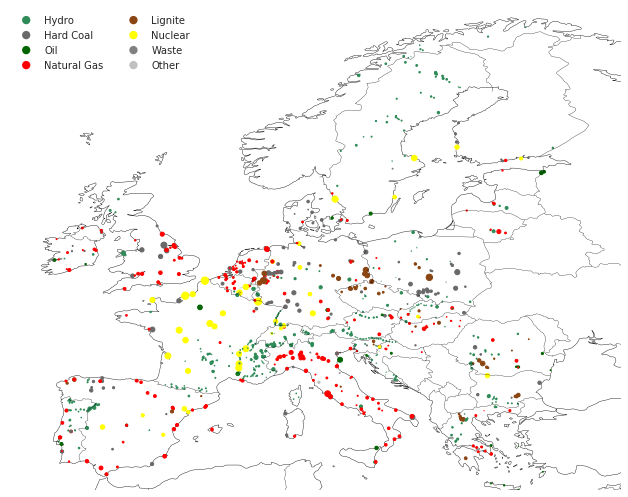

In [17]:
geo.powerplant.plot_map();

In [18]:
geo.powerplant.lookup().head(20).to_frame()

Capacity
Country        Fueltype             
Austria        Hard Coal     985.994
               Hydro        7256.102
               Natural Gas  2901.370
               Oil           337.761
Belgium        Hard Coal     816.914
               Hydro        1298.665
               Natural Gas  4500.851
               Nuclear      2977.235
Bulgaria       Hard Coal    1847.015
               Hydro        2271.509
               Lignite      2709.644
               Nuclear      1902.994
Croatia        Hard Coal     303.241
               Hydro        1444.595
               Natural Gas   534.605
               Oil           674.858
Czech Republic Hard Coal    1272.694
               Hydro        1408.285
               Lignite      6085.531
Denmark        Hard Coal    4944.670

In [19]:
geo.powerplant.fill_missing_commyears().head()

GEO,Name,Fueltype,Technology,Set,Country,Capacity,Duration,YearCommissioned,Retrofit,lat,lon,File,projectID
0,Aarberg,Hydro,Run-Of-River,PP,Switzerland,10.504635,NaN,1968,1968.0,47.03780,7.2720,NaN,GEO45222
1,Aberthaw,Hard Coal,Steam Turbine,PP,United Kingdom,1378.369320,NaN,2008,2008.0,51.38731,-3.4049,NaN,GEO1972
2,Abono,Hard Coal,Steam Turbine,PP,Spain,846.962001,NaN,2005,2005.0,43.55280,-5.7231,NaN,GEO43673
3,Abwinden asten,Hydro,Run-Of-River,PP,Austria,113.856689,NaN,1979,1979.0,48.24798,14.4305,NaN,GEO45165
4,Aceca,Oil,Steam Turbine,PP,Spain,573.629610,NaN,1994,1994.0,39.94100,-3.8569,NaN,GEO43790


Of course the pandas function are also very convenient:

In [39]:
print('Total capacity of GEO is: \n  {} MW \n'.format(geo.Capacity.sum()));
print('The technology types are: \n {} '.format(geo.Technology.unique()))

Total capacity of GEO is: 
  495111.30290304957 MW 

The technology types are: 
 ['Run-Of-River' 'Steam Turbine' 'CCGT' nan 'Reservoir' 'OCGT'
 'Pumped Storage' 'Reciprocating Engine' 'Oil Engine' 'Gas Turbine'
 'CCGT, Thermal' 'Tidal' 'Gas Engines'] 


## Incomplete data

All open databases are so far not complete and cover only an part of overall European powerplants. We perceive the capacity gaps looking at the [ENTSOE SO&AF Statistics](https://docs.entsoe.eu/dataset/scenario-outlook-adequacy-forecast-2012-2030). 

In [7]:
stats = pm.data.Capacity_stats()

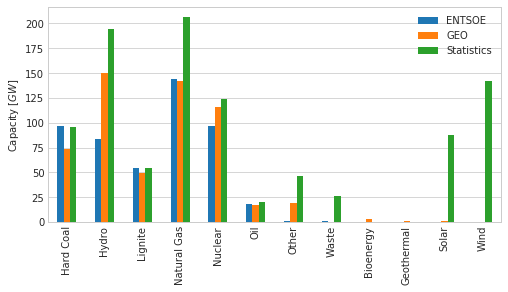

In [16]:
pm.plot.fueltype_totals_bar([geo, entsoe, stats], keys=["ENTSOE", "GEO", 'Statistics']);

The gaps for both datasets are unmistakable. Adding both datasets on top of each other would not be a solution, since the intersection of both sources are two high, and the resulting dataset would include many duplicates. A better approach is to merge the incomplete datasets together, respecting **intersections** and **differences** of each dataset. 

## Merging datasets

Before comparing two lists of power plants, we need to make sure that the data sets are on the same level of aggretation. That is, we ensure that all power plants blocks are aggregated to [powerplant stations](https://en.wikipedia.org/wiki/Power_station). 

In [9]:
dfs = [geo.powerplant.aggregate_units(), entsoe.powerplant.aggregate_units()]
intersection = pm.matching.combine_multiple_datasets(dfs)

INFO:powerplantmatching.cleaning:Cleaning plant names in 'GEO'.
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'GEO'.
INFO:powerplantmatching.cleaning:Cleaning plant names in 'ENTSOE'.
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'ENTSOE'.
INFO:powerplantmatching.utils:Run process with 2 parallel threads.
INFO:powerplantmatching.matching:Comparing GEO with ENTSOE


In [10]:
intersection.head()

GEO            Name                  Fueltype                  Technology  \
                GEO       ENTSOE          GEO       ENTSOE            GEO   
0             Abono        Aboño    Hard Coal    Hard Coal  Steam Turbine   
1        Novaky eno       Nováky      Lignite      Lignite  Steam Turbine   
2            Paluel       Paluel      Nuclear      Nuclear            NaN   
3    Palos frontera        Palos  Natural Gas  Natural Gas           CCGT   
4       Ottmarsheim  Ottmarsheim        Hydro        Hydro   Run-Of-River   

GEO         Set          Country            \
    ENTSOE  GEO ENTSOE       GEO    ENTSOE   
0      NaN   PP     PP     Spain     Spain   
1      NaN  CHP     PP  Slovakia  Slovakia   
2      NaN   PP     PP    France    France   
3      NaN   PP     PP     Spain     Spain   
4      NaN   PP     PP    France    France   

GEO                        ...                         Retrofit         \
                           ...                              GEO ENTSOE   
0                          ...                           2005.0    NaN   
1                          ...                           1994.0    NaN   
2                          ...                              NaN    NaN   
3                          ...                              NaN    NaN   
4                          ...                           1952.0    NaN   

GEO       lat                  lon            File          projectID  \
          GEO     ENTSOE       GEO     ENTSOE  GEO ENTSOE         GEO   
0    43.55280  43.481024  -5.72310  -5.801112  NaN    NaN  [GEO43673]   
1    48.69884  48.719062  18.53346  18.542056  NaN    NaN  [GEO42634]   
2    49.85822  49.832363   0.63537   0.629065  NaN    NaN   [GEO4689]   
3    37.18430  37.228894  -6.88570  -6.895426  NaN    NaN  [GEO43799]   
4    47.77400  47.787190   7.52300   7.506512  NaN    NaN  [GEO39779]   

GEO                                                     
                                                ENTSOE  
0                 [18WABO2-12345-0N, 18WABO1-12345-0X]  
1                                   [24WV--ENO------B]  
2    [17W100P100P0224N, 17W100P100P0222R, 17W100P10...  
3    [18WPALOS3-123-0J, 18WPALOS1-123-0Z, 18WPALOS2...  
4                                   [17W100P100P0306L]  

[5 rows x 26 columns]

The result of the matching process is a multiindexed dataframe. To bring the matched dataframe into a convenient format, we combine the information of the two source sources.

In [11]:
intersection = intersection.powerplant.reduce_matched_dataframe()
intersection.head()

,Name,Fueltype,Technology,Set,Country,Capacity,Duration,YearCommissioned,Retrofit,lat,lon,File,projectID
0,Aboño,Hard Coal,Steam Turbine,PP,Spain,877.5,0.0,2005.0,2005.0,43.481024,-5.801112,NaN,"{'GEO': ['GEO43673'], 'ENTSOE': ['18WABO2-1234..."
1,Nováky,Lignite,Steam Turbine,PP,Slovakia,440.0,0.0,1994.0,1994.0,48.719062,18.542056,NaN,"{'GEO': ['GEO42634'], 'ENTSOE': ['24WV--ENO---..."
2,Paluel,Nuclear,NaN,PP,France,5320.0,0.0,NaN,NaN,49.832363,0.629065,NaN,"{'GEO': ['GEO4689'], 'ENTSOE': ['17W100P100P02..."
3,Palos,Natural Gas,CCGT,PP,Spain,1166.8,0.0,NaN,NaN,37.228894,-6.895426,NaN,"{'GEO': ['GEO43799'], 'ENTSOE': ['18WPALOS3-12..."
4,Ottmarsheim,Hydro,Run-Of-River,PP,France,156.0,0.0,1952.0,1952.0,47.787190,7.506512,NaN,"{'GEO': ['GEO39779'], 'ENTSOE': ['17W100P100P0..."


As you can see in the very last column, we can track which original data entries flew into the resulting one.

We can have a look into the Capacity statisitcs

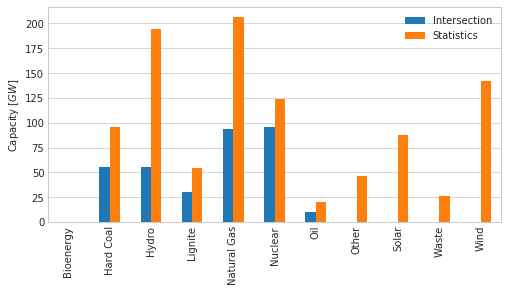

In [12]:
pm.plot.fueltype_totals_bar([intersection, stats], keys=["Intersection", 'Statistics']);

In [13]:
combined = intersection.powerplant.extend_by_non_matched(entsoe).powerplant.extend_by_non_matched(geo)

INFO:powerplantmatching.cleaning:Cleaning plant names in 'ENTSOE'.
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'ENTSOE'.
INFO:powerplantmatching.cleaning:Cleaning plant names in 'GEO'.
INFO:powerplantmatching.cleaning:Aggregating blocks to entire units in 'GEO'.


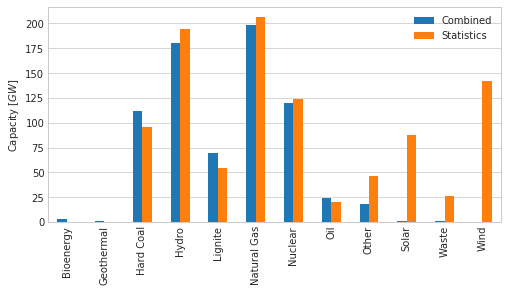

In [14]:
pm.plot.fueltype_totals_bar([combined, stats], keys=["Combined", 'Statistics']);

The aggregated capacities roughly match the SO&AF for all conventional powerplants

## Processed Data

powerplantmatching comes along with already matched data, this includes data from GEO, ENTSOE, OPSD, CARMA, GPD and ESE (ESE, only if you have followed the [instructions](https://github.com/FRESNA/powerplantmatching))

In [40]:
m = pm.collection.matched_data()

/home/fabian/.anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


(<Figure size 792x648 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7ff8a7307898>)

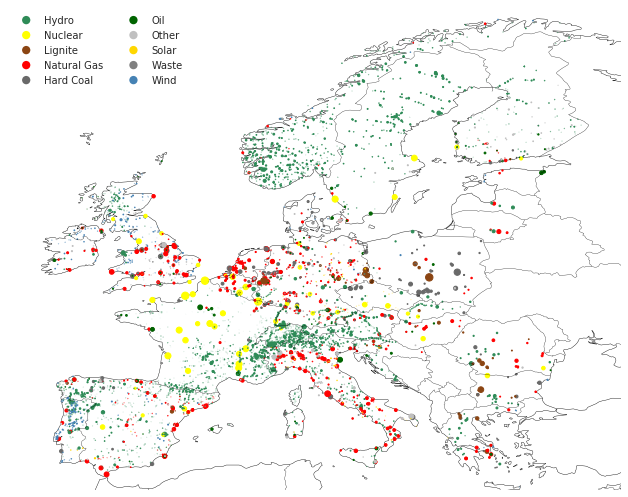

In [41]:
m.powerplant.plot_map()

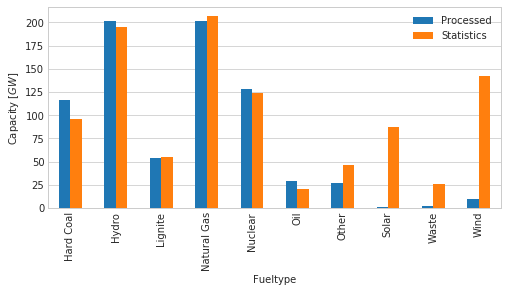

In [62]:
pm.plot.fueltype_totals_bar([m, stats], keys=["Processed", 'Statistics']);

(<Figure size 864x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff8a6c2a940>)

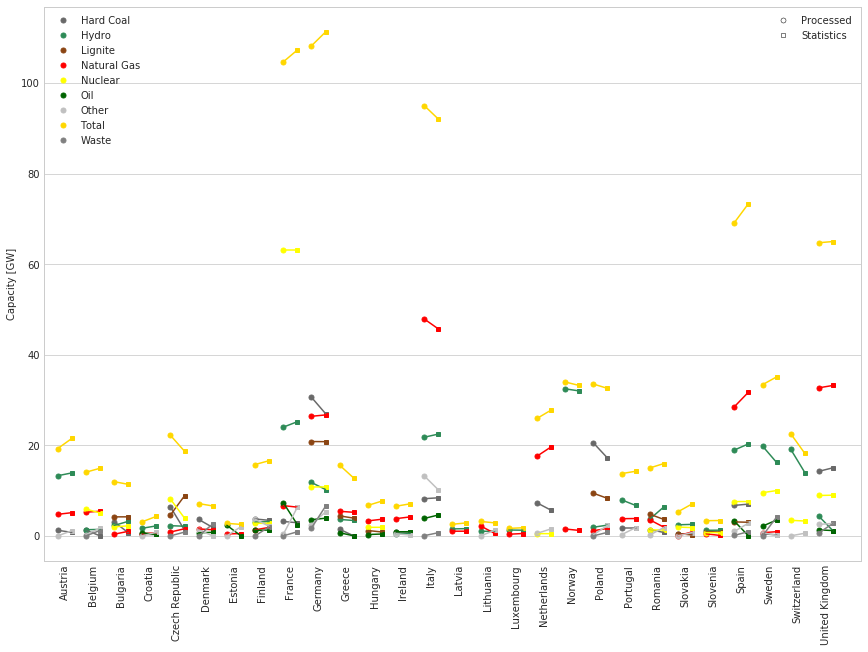

In [63]:
pm.plot.factor_comparison([m, stats], keys=['Processed', 'Statistics'])

In [42]:
m.head()a

,Name,Fueltype,Technology,Set,Country,Capacity,Duration,YearCommissioned,Retrofit,lat,lon,File,projectID
id,,,,,,,,,,,,,
0,Alta,Hydro,Reservoir,PP,Norway,100.0,0.0,1987.0,1987.0,69.705012,23.818703,"ENTSOE, IWPDCY.csv, Nordpool","{'GPD': ['GPD11499'], 'CARMA': ['CARMA1122'], ..."
1,Skjomen,Hydro,Reservoir,PP,Norway,300.0,0.0,NaN,NaN,68.182858,17.349864,"ENTSOE, IWPDCY.csv, Nordpool","{'GPD': ['GPD11756'], 'CARMA': ['CARMA41924'],..."
2,Svartisen,Hydro,Reservoir,PP,Norway,600.0,0.0,1993.0,2011.0,66.728748,13.914312,"ENTSOE, IWPDCY.csv, Nordpool","{'GPD': ['GPD11774'], 'CARMA': ['CARMA43936'],..."
3,Aurland,Hydro,Pumped Storage,Store,Norway,270.0,0.0,1979.0,1979.0,60.903570,7.201723,"energy_storage_exchange, ENTSOE, IWPDCY.csv, N...","{'ESE': ['ESE170'], 'GPD': ['GPD11510'], 'CARM..."
4,Saurdal,Hydro,Pumped Storage,Store,Norway,640.0,0.0,1986.0,1986.0,59.498810,6.526562,"energy_storage_exchange, ENTSOE, IWPDCY.csv, N...","{'ESE': ['ESE169'], 'GPD': ['GPD11748'], 'CARM..."


In [61]:
pd.concat([m[m.YearCommissioned.notnull()].groupby('Fueltype').YearCommissioned.count(),
          m[m.YearCommissioned.isna()].fillna(1).groupby('Fueltype').YearCommissioned.count()], 
          keys=['YearCommissioned existent', 'YearCommissioned missing'], axis=1)

,YearCommissioned existent,YearCommissioned missing
Fueltype,,
Hard Coal,112,85
Hydro,1682,1955
Lignite,40,32
Natural Gas,365,299
Nuclear,30,32
Oil,71,62
Other,136,158
Solar,5,92
Waste,72,58
